# Data Creator For ML Algorithms

## Dependencies

In [21]:
#Common Dependencies
import pandas as pd
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
#Raw Data Extractor
from modules.authenticator import authenticator
from modules.get_info import get_info
from modules.extract_features import extract_features
#Data Editor
from modules.create_sample import create_sample
from modules.populate import populate
#Spotify User Credentials
sp = authenticator()

pd.set_option('display.max_rows', 10)

## Raw Data Extractor

### Provide Spotify links

In [ ]:
#Links
links = ['https://open.spotify.com/album/7MUY0WxCmHcgEEeQNjoe8a?si=qKqQX0G2QTyvix4uSsraZA']

### Extract raw data 

In [ ]:
#Extract URI from links
print('Extracting URIs from links...')
info_dict, url_types = get_info(sp, links)
print('............................')
print('URIs have been extracted\n')

#Extract data from URIs
print('Extracting data...')
dataframe = extract_features(sp, info_dict, url_types)
print('............................')
print('Data has been extracted\n')

#Remove duplicates
print('Number of duplicates:', dataframe.duplicated().sum())
if dataframe.duplicated().sum() > 0:
    print('Removing duplicates...')
    dataframe = dataframe.drop_duplicates()
    print('Duplicates have been removed')
    print('Number of duplicates:', dataframe.duplicated().sum())

#Show a dataframe
print('\nDataframe:')
dataframe

## Load Data

In [46]:
path = 'Genres/RockGenre_pop.csv'
dataframe = pd.read_csv(path)
if 'Unnamed: 0' in dataframe.columns:
    dataframe = dataframe.drop(columns = 'Unnamed: 0')
dataframe

,Track URI,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genres
0,NaN,0.274000,0.956000,4,-4.978000,1,0.081400,0.000014,0.000001,0.117000,0.339000,150.207000,258648.0000,4,rock
1,NaN,0.622000,0.715000,6,-4.040000,0,0.032300,0.000982,0.000000,0.079600,0.607000,131.012000,164682.0000,4,rock
2,NaN,0.396000,0.939000,9,-3.155000,0,0.227000,0.000285,0.000000,0.212000,0.390000,185.081000,205368.0000,4,rock
3,NaN,0.736000,0.534000,11,-9.220000,0,0.036700,0.043300,0.004340,0.066400,0.552000,127.035000,192441.0000,4,rock
4,NaN,0.413000,0.876000,11,-4.577000,1,0.057000,0.000938,0.000104,0.387000,0.341000,164.080000,214724.0000,4,rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2048,NaN,0.448448,0.714255,7,-5.314087,0,0.059413,0.059377,0.004942,0.197846,0.637814,108.522097,207231.0576,4,rock
2049,NaN,0.568415,0.815531,6,-7.628108,0,0.059020,0.069449,0.004818,0.179549,0.401958,136.178739,259783.1672,4,rock
2050,NaN,0.421619,0.712233,7,-7.461391,0,0.061879,0.038470,0.002903,0.269061,0.355729,129.014995,247744.1772,4,rock
2051,NaN,0.569428,0.761241,5,-5.643730,0,0.045072,0.017508,0.002560,0.137540,0.393277,125.444332,270526.1080,4,rock


## Data Editor

### (I) Populating Median Neigbourhood

In [ ]:
#Populate with additional data
print('Shape before populating:', dataframe.shape)
print('............................')
print('Populating...')
print('Populating has been done')
dataframe = populate(dataframe.select_dtypes(include='number'), 1000)
print('............................')
print('Shape after populating:', dataframe.shape)

#Show a dataframe
print('\nDataframe:')
dataframe

### (II) Feature Extracting

In [47]:
#Calculate and add additional features columns
dataframe['danceability_energy_ratio'] = dataframe['danceability'] * dataframe['energy']
dataframe['danceability_valence_ratio'] = dataframe['danceability'] * dataframe['valence']

#Show a dataframe
print('\nDataframe:')
dataframe


Dataframe:


,Track URI,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genres,danceability_energy_ratio,danceability_valence_ratio
0,NaN,0.274000,0.956000,4,-4.978000,1,0.081400,0.000014,0.000001,0.117000,0.339000,150.207000,258648.0000,4,rock,0.261944,0.092886
1,NaN,0.622000,0.715000,6,-4.040000,0,0.032300,0.000982,0.000000,0.079600,0.607000,131.012000,164682.0000,4,rock,0.444730,0.377554
2,NaN,0.396000,0.939000,9,-3.155000,0,0.227000,0.000285,0.000000,0.212000,0.390000,185.081000,205368.0000,4,rock,0.371844,0.154440
3,NaN,0.736000,0.534000,11,-9.220000,0,0.036700,0.043300,0.004340,0.066400,0.552000,127.035000,192441.0000,4,rock,0.393024,0.406272
4,NaN,0.413000,0.876000,11,-4.577000,1,0.057000,0.000938,0.000104,0.387000,0.341000,164.080000,214724.0000,4,rock,0.361788,0.140833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2048,NaN,0.448448,0.714255,7,-5.314087,0,0.059413,0.059377,0.004942,0.197846,0.637814,108.522097,207231.0576,4,rock,0.320306,0.286027
2049,NaN,0.568415,0.815531,6,-7.628108,0,0.059020,0.069449,0.004818,0.179549,0.401958,136.178739,259783.1672,4,rock,0.463560,0.228479
2050,NaN,0.421619,0.712233,7,-7.461391,0,0.061879,0.038470,0.002903,0.269061,0.355729,129.014995,247744.1772,4,rock,0.300291,0.149982
2051,NaN,0.569428,0.761241,5,-5.643730,0,0.045072,0.017508,0.002560,0.137540,0.393277,125.444332,270526.1080,4,rock,0.433472,0.223943


### (III) KDE Trimming

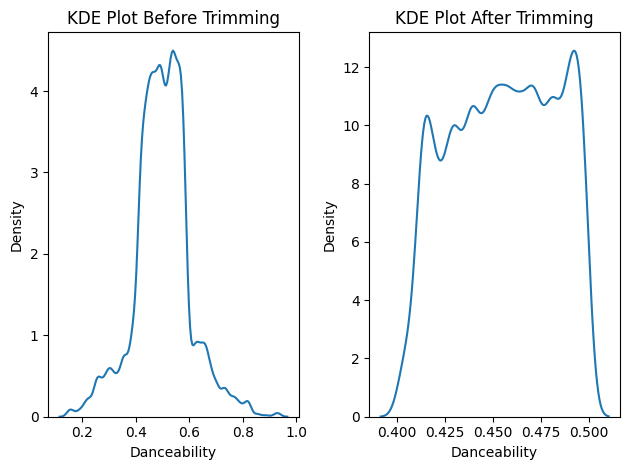

In [48]:
# KDE plot for feature before trimming
plt.subplot(1, 2, 1)
sns.kdeplot(data=dataframe, x='danceability', bw_adjust=0.5)
plt.xlabel('Danceability')
plt.ylabel('Density')
plt.title('KDE Plot Before Trimming')

#Trim features
dataframe = dataframe[(dataframe['danceability'] > 0.4) & (dataframe['danceability'] < 0.5)]

# KDE plot for feature after trimming
plt.subplot(1, 2, 2)
sns.kdeplot(data=dataframe, x='danceability', bw_adjust=0.5)
plt.xlabel('Danceability')
plt.ylabel('Density')
plt.title('KDE Plot After Trimming')

plt.tight_layout()
plt.show()

### For training data set tracklist genre

In [ ]:
dataframe['genres'] = 'rock'
dataframe.head()

## Save data to csv

In [49]:
path = 'Genres/RockGenre_AllMods.csv'
dataframe.to_csv(path)